# **Avaliação 01 - Processamento de Imagens**

In [ ]:
# Bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image

In [ ]:
# Lendo a imagem em RGB
imagem = cv2.imread("/content/drive/MyDrive/Visão Computacional/Avaliacoes/Paisagem.jpg", cv2.IMREAD_COLOR)
imagem = imagem[:, :, ::-1] # Inversão das matrizes BGR para RGB

# Lendo em tons de cinza
imagem_cinza = cv2.imread("/content/drive/MyDrive/Visão Computacional/Avaliacoes/Paisagem.jpg", cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Imagem em Tons de Cinza: ')

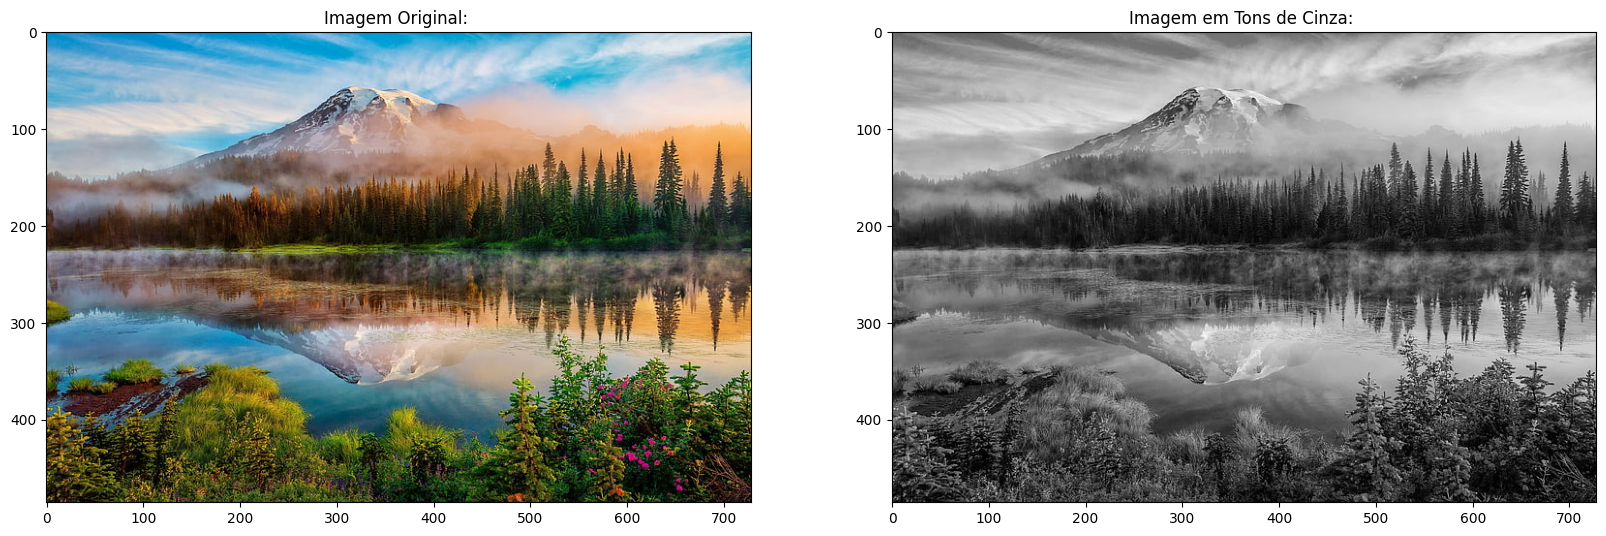

In [ ]:
# Criando um painel para a organização das imagens
figura = plt.figure(figsize=(20, 50)) # Parâmetros: (largura, altura)

# Adicionando o primeiro subplot (*)
eixo_imagem_original = figura.add_subplot(121) # Parâmetros: (nª linha, n colunas, nº subplot)
plt.imshow(imagem)
plt.title("Imagem Original: ")

# Adicionando o segundo subplot (*)
eixo_imagem_filtrada1 = figura.add_subplot(122)
plt.imshow(imagem_cinza, cmap='gray')
plt.title("Imagem em Tons de Cinza: ")

In [ ]:
# Imprimindo dimensões da imagem colorida
print("Número total de pixels: ", imagem.size)
print("Dimensões (altura e largura), matrizes de cores: ", imagem.shape)

# Imprimindo dimensões da imagem em tons de cinza
print("\nNúmero total de pixels: ", imagem_cinza.size)
print("Dimensões (altura e largura), matrizes de cores: ", imagem_cinza.shape)

Número total de pixels:  1061424
Dimensões (altura e largura), matrizes de cores:  (486, 728, 3)

Número total de pixels:  353808
Dimensões (altura e largura), matrizes de cores:  (486, 728)


In [ ]:
# Imprimindo o valor máximo e mínimo da imagem em tons de cinza
print("Último grau de tonalidade:", imagem_cinza.max())
print("Primeiro grau de tonalidade:", imagem_cinza.min())

Último grau de tonalidade: 255
Primeiro grau de tonalidade: 0


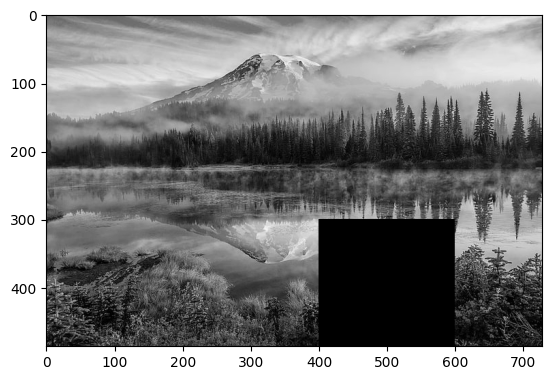

In [ ]:
# Modificando a intensidade dos pixels de uma ROI
imagem_cinza[410:, 400:600] = 0 # Entre 0 (Preto) e 255 (Branco)
plt.imshow(imagem_cinza, cmap='gray')

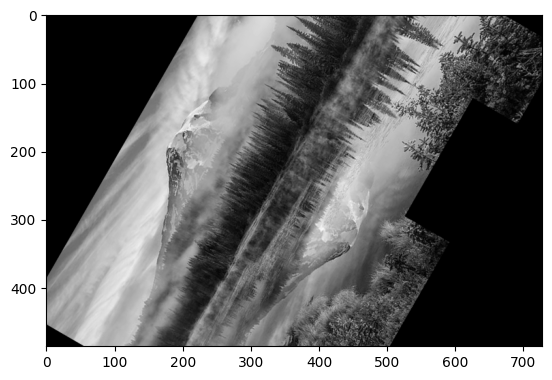

In [ ]:
# Rotação da imagem com variação de tamanho
altura = imagem_cinza.shape[0] # Primeira posição: quantidade de linhas
largura = imagem_cinza.shape[1] # Segunda posição: quantidade de colunas
ponto = (largura / 2, altura / 2) # Obtém o pixel mediano da imagem
rotacao = cv2.getRotationMatrix2D(ponto, 60, 1) # Parâmetros: (Ponto, Graus e Zoom), OBS: 1.0 não altera o tamanho

# Plotando a imagem rotacionada
imagem_rotacionada = cv2.warpAffine(imagem_cinza, rotacao, (largura, altura))
plt.imshow(imagem_rotacionada, cmap='gray')

In [ ]:
# Lendo em tons de cinza
imagem_cinza = cv2.imread("/content/drive/MyDrive/Visão Computacional/Avaliacoes/Paisagem.jpg", cv2.IMREAD_GRAYSCALE)

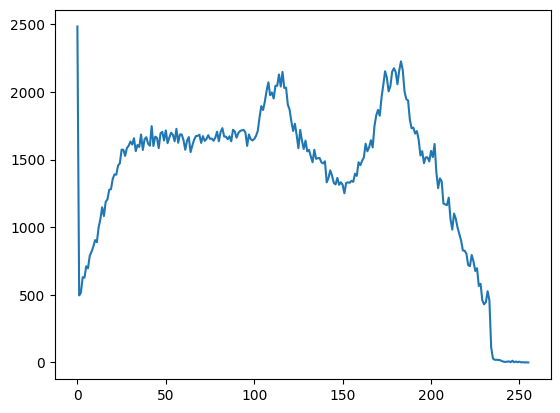

In [ ]:
# Obtendo o histograma da imagem
histograma = cv2.calcHist([imagem_cinza], [0], None, [256], [0, 255])
plt.plot(histograma) # Plota o envoltório (Eixo X: tons de cinza | Eixo Y: frequência de pixels)

In [ ]:
# Aplicando Filtro de Mediana - Função "medianBlur"
imagem_mediana1 = cv2.medianBlur(imagem_cinza, 5) # Parâmetros: (imagem, ordem ímpar da máscara)

Text(0.5, 1.0, 'Imagem com Filtro de Mediana: ')

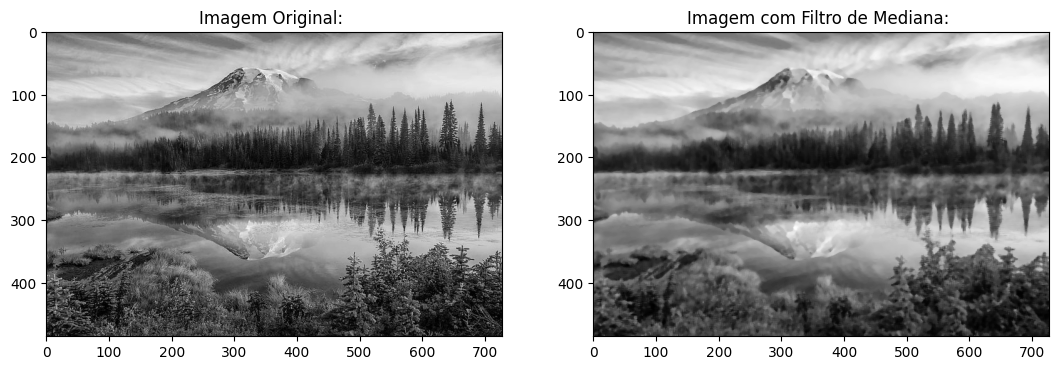

In [ ]:
# Criando um painel para a organização das imagens
figura = plt.figure(figsize=(20, 50)) # Parâmetros: (largura, altura)

# Adicionando o primeiro subplot (*)
eixo_imagem_original = figura.add_subplot(131) # Parâmetros: (nª linha, n colunas, nº subplot)
plt.imshow(imagem_cinza, cmap='gray')
plt.title("Imagem Original: ")

# Adicionando o segundo subplot (*)
eixo_imagem_filtrada1 = figura.add_subplot(132)
plt.imshow(imagem_mediana1, cmap='gray')
plt.title("Imagem com Filtro de Mediana: ")

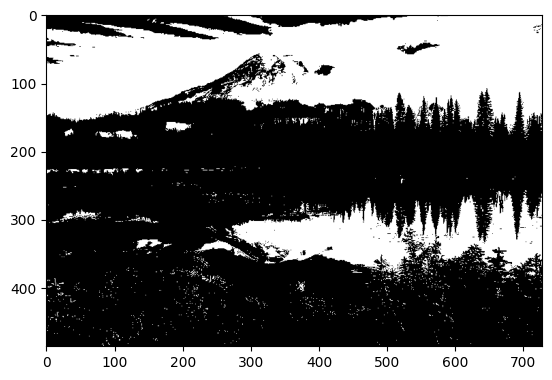

In [ ]:
# Segmentação da imagem através da binarização
limiar, imagem_limiar1 = cv2.threshold(imagem_cinza, 150, 255, cv2.THRESH_BINARY) # Parâmetros: (imagem, limiar, valor máximo, função de realce) (*)
plt.imshow(imagem_limiar1, cmap='gray')
# OBS: Tons acima ficam negros (0), enquanto os que estão abaixo se tornam brancos (255)

Limiar encontrado pelo Otsu:  116.0


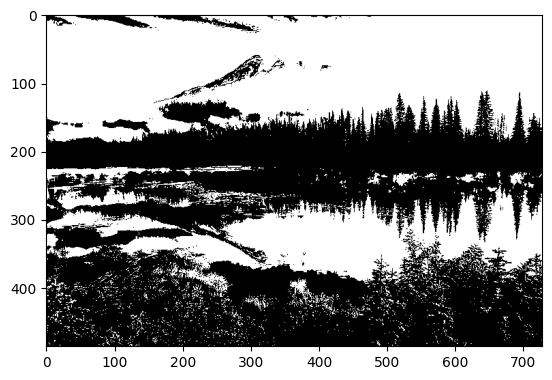

In [ ]:
# Segmentação da imagem através da binarização com Otsu
limiar, imagem_limiar2 = cv2.threshold(imagem_cinza, 0, 255, cv2.THRESH_OTSU)
print("Limiar encontrado pelo Otsu: ", limiar)
plt.imshow(imagem_limiar2, cmap='gray')
# OBS: O limiar é encontrado automaticamente, baseando-se no histograma da imagem

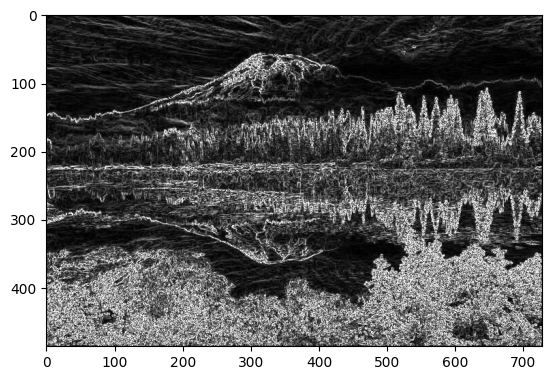

In [ ]:
# Detectando bordas com Sobel

# 1º: Convertendo para PFPD e criando a máscara no eixo correspondente
imagem_sobelX = cv2.Sobel(imagem_cinza, cv2.CV_64F, 1, 0)
imagem_sobelY = cv2.Sobel(imagem_cinza, cv2.CV_64F, 0, 1)

# 2º: Convertendo novamente para número inteiro sem sinal representado por 8 bits
imagem_sobelX = np.uint8(np.absolute(imagem_sobelX))
imagem_sobelY = np.uint8(np.absolute(imagem_sobelY))

# 3º: Unindo as imagem de ambos os eixos:
imagem_sobel = cv2.bitwise_or(imagem_sobelX, imagem_sobelY)
plt.imshow(imagem_sobel, cmap="gray")